### Title: Building Androids Apps: What's atractive to user?


### 1. Introduction:
This project is about studying the content of appstore to help developers know what kind of apps users might be more interested in
 
* Goal: help developers understand what type of apps are likely to attract more users on Google Play 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define helper functions

def load_data(path=''):
    """ Load data 
    Params:
    ======
        path: str, path to file
        
    Output:
    =======
        pandas dataframe
    """
    df = pd.read_csv(path,sep=',')
    print('Number of records: ',df.shape[0])
    print('Number of columns: ',df.shape[1])
    return df

def preview_data(df, start=0, end=5):
    """Easily preview any section of the data
    
    Params:
    =======
        start: int, start index 
        end: int, end index
        
    Output:
    =======
        data slice
    """
    return df.loc[start:end]

def check_duplicates(df,count_unique=True,subset=''):
    """Checks for duplicate records
    
    Params:
    =======
        df: pandas df
        count_unique: bool, return a count of the number of unique records with duplicate entries
    """
    def count_unique():

        duplicates = df.duplicated(subset=subset)
        duplicate_idx = duplicates[duplicates==True].index.tolist()  # obtain indices of duplicate data

        dup_df = df.loc[duplicate_idx]                    # obtain duplicate records using indices
        dup_df.head()
        return 'Number of unique records with duplicates: ' + str(dup_df[subset].unique().shape[0])
        
    if count_unique:
        print('Total number of duplicate records : ',df.duplicated(subset=subset).sum())
        print(count_unique())

def remove_duplicates(df,sort_by=list(),subset=''):
    temp = df.sort_values(by=sort_by,ascending=False)
    temp.drop_duplicates(subset = [subset],keep='first',inplace=True)
    
    print('Number of records before removing duplicates: ',df.shape[0])
    print('Number of records after removing duplicates: ',temp.shape[0])
    return temp

In [3]:
# load data
print('== Play store data ==: ')
playstore_df = load_data('googleplaystore.csv')

== Play store data ==: 
Number of records:  10841
Number of columns:  13


In [4]:
# Preview play store
preview_data(playstore_df)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### 2. Preprocessing
* check for duplicate app names
* check for missing data
* check for wrong data entries

In [5]:
# check number of duplicates

check_duplicates(playstore_df,subset='App')

Total number of duplicate records :  1181
Number of unique records with duplicates: 798


### strategy for removing duplicates :
* Goal: of the duplicates, we want to keep the one with the highest number of reviews 
* sort the data by App and Reviews in decreasing order of number of reviews, then remove duplicates, keeping only first one

In [6]:
# remove deuplcates
playstore_df = remove_duplicates(playstore_df,sort_by=['App','Reviews'],subset='App')

Number of records before removing duplicates:  10841
Number of records after removing duplicates:  9660


###  Check for out-of-place data

In [7]:
playstore_df.describe(include='all')   # notice that there is 19.0 in the Reviews columns which shouldn't be

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9660,9660,8197.000000,9660,9660,9660,9659,9660,9659,9660,9660,9652,9657
unique,9660,34,NaN,5331,462,22,3,93,6,120,1378,2819,33
top,Boomerang,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1876,NaN,593,1227,1418,8902,8903,7903,827,252,1055,2203
mean,NaN,NaN,4.174893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.560928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Rating column should contain numbers between 1 and 5 inclusive, so a max of 19 is definitely off
# find the row with this number and remove it

playstore_df[playstore_df.Rating==19] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
playstore_df.drop(labels=10472,axis=0,inplace=True)
playstore_df.shape

(9659, 13)

### 3. Analysis
* we want to target apps for English-speaking audience for this analysis
* we wish to restrict analysis to free apps only as that is the remenue model for many of the apps in the playstore



* NOTE: The function below uses a simple scheme for telling if an App is one for English audience or not. Just check the characters in the name and based on the number of non-english characters decide whether they're English or non-English

In [10]:
# simple function for determining if App is intended for English audience

def is_english(text):
    """ Counts non-ascii characters 
    """
    non_ascii = 0
    
    for character in text:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return 'no'
    else:
        return 'yes'
    
playstore_df['is_english'] = playstore_df['App'].apply(lambda x: is_english(x))

In [11]:
# how many non-English apps do we have?

playstore_df[playstore_df['is_english']=='no'].shape[0]

45

In [36]:
# isolate the English Apps just for convenience
enApps = playstore_df[playstore_df['is_english']=='yes']
enApps = playstore_df[playstore_df['Type']=='Free']  # then select only free apps


enApps.shape    # now we are left with 8902 records

(8902, 14)

### 3a. Questions to answer:
* 1. what are the top 10 ten app categories?
* 2. what are the top 10 app genres (by the average number of installs)?
* 3. what are the top apps by the number of installs?

In [13]:
# prepare plotting functions

In [49]:
import matplotlib.style as style
style.use(['fivethirtyeight',])

def bar_plot(df, ax, x, y,figsize,kind='bar'):
    #if kind='barh'
    plot_obj = df.plot(x=x, y=y, ax=ax, figsize=figsize,kind=kind,sort_columns=True,table=True)
    plot_obj.axhline(y=0,color='black',linewidth=1.0,alpha=0.7)
    plot_obj.xaxis.label.set_visible(False)
    return plot_obj

def barh_plot(df, ax, x, y,figsize=(12,8),kind='barh'):
    #if kind='barh'
    plot_obj = df.plot(x=x, y=y, ax=ax, figsize=figsize,kind=kind,sort_columns=True)
    plot_obj.axvline(x=0,color='black',linewidth=1.0,alpha=0.7)
    plot_obj.xaxis.label.set_visible(False)
    return plot_obj

def get_labels(plot_obj,ylabels=True):
    if ylabels:
        ylabs=[]
        for i in list(plot_obj.get_yticklabels()):
            ylabs.append(i._text)
        return ylabs
    elif not ylabels:
        xlabs=[]
        for i in list(plot_obj.get_xticklabels()):
            xlabs.append(i._text)
        return xlabs
    

## == Misc functions == ##

def sort_bars(df):
    """Sorts the indices of the given dataframe so that bars appear sorted when plotted
    Params:
    ======
    df: df to sort index
    topX: 
    """
    num_rows = df.shape[0]
    df.reset_index(drop=True,inplace=True)
    indices = [num_rows-1-i for i in range(num_rows)]
    df.index = indices
    df.sort_index(ascending=True,inplace=True)
    return df

#import re
def convert_install_2_nums(text):
    text = text.replace(',','')
    text = text.replace('+','')
    return int(text)
# ylabels=[]
# labels=list(plot_obj.get_yticklabels())

# for i in plot_obj.get_yticklabels():
#             ylabels.append(i._text)
# #ylabels[-2]='12%'
# ylabels

In [62]:
# decorate plots

def do_headings(plot_obj,fig,what=['main_heading','sub_heading'],texts=[]):
    xmin_xmax = plot_obj.get_xlim()
    ymin_ymax =plot_obj.get_ylim()
    
    def main_heading(text):
        
        # heading text
#         plot_obj.text(x = xmin_xmax[0], y = ymin_ymax[1] + 2, s = "The best Apps are for business",
#                           fontsize = 26, weight = 'bold', alpha = .75)
        plot_obj.text(x = 0.0, y = 1, s = text,
                          fontsize = 26, weight = 'bold', alpha = .75,
                     transform=fig.transFigure)
        return plot_obj
    
    def sub_heading(text):
        
        # heading text
#         plot_obj.text(x = xmin_xmax[0], y = ymin_ymax[1] + .5, s = text,
#                           fontsize = 19, alpha = .85)
        plot_obj.text(x = 0.0, y = 0.91, s = text,
                          fontsize = 19, alpha = .85,
                     transform=fig.transFigure)
        return plot_obj
    
    ## do calls here
    if 'main_heading' in what:
            main_heading(texts[0])
    if 'sub_heading' in what:
            sub_heading(texts[1])

def do_credits(plot_obj):
    xmin_xmax = plot_obj.get_xlim()
    ymin_ymax =plot_obj.get_ylim()
    
    left = '© Amo'
    right = 'Data Source: GooglePlay'
    _ = plot_obj.text(x = 0, y = 0,
                      s=left,fontsize = 14, 
                      weight='bold',
                      color = '#f0f0f0', 
                      backgroundcolor = 'grey',
                      verticalalignment='center',
                      horizontalalignment='center',
                      transform = fig.transFigure,
                      
                 )
    _ = plot_obj.text(x = 0.9, y = 0,
                      s=right,fontsize = 14, 
                      color = '#000000', 
                      
                      verticalalignment='center',
                      horizontalalignment='center',
                      transform = fig.transFigure,
                      
                 )
    
    
def label_bars(plt_obj,df,value_label='percent'):
    ycords = plot_obj.get_yticks().tolist()
    xcords = df[value_label].values.tolist()

    for i,(j,k) in enumerate(zip(xcords,ycords)):
        _ = plot_obj.text(x=-1.5,y=k,s=str(j)+'%', 
                          verticalalignment='baseline',
                         color='#000000',
                          fontsize = 14,
                          
                         )
    return plot_obj

def change_xlim(plot_obj,left):
    
    return plot_obj.set_xlim(left=left,right=plot_obj.get_xlim()[1])
    

def turn_off_labels(plot_obj,axis='x',which='both'):
    return plot_obj.tick_params(axis=axis,which=which,bottom=False,labelbottom=False)

### Render Plots

In [37]:
# Q0: What are the top 10 categories by the number of Apps?
X=10
topX_categories =enApps[['Category','App']].groupby(by='Category').count().reset_index()
topX_categories['percent'] = topX_categories['App'].apply(lambda x: round((x/float(topX_categories.App.sum()))*100,1))
topX_categories = topX_categories.sort_values(by='App',ascending=False)[:X] # sort values to obtain top X

topX_categories = sort_bars(topX_categories)
topX_categories

,Category,App,percent
0,PERSONALIZATION,295,3.3
1,SPORTS,301,3.4
2,MEDICAL,312,3.5
3,FINANCE,328,3.7
4,PRODUCTIVITY,346,3.9
5,LIFESTYLE,350,3.9
6,BUSINESS,408,4.6
7,TOOLS,750,8.4
8,GAME,861,9.7
9,FAMILY,1691,19.0


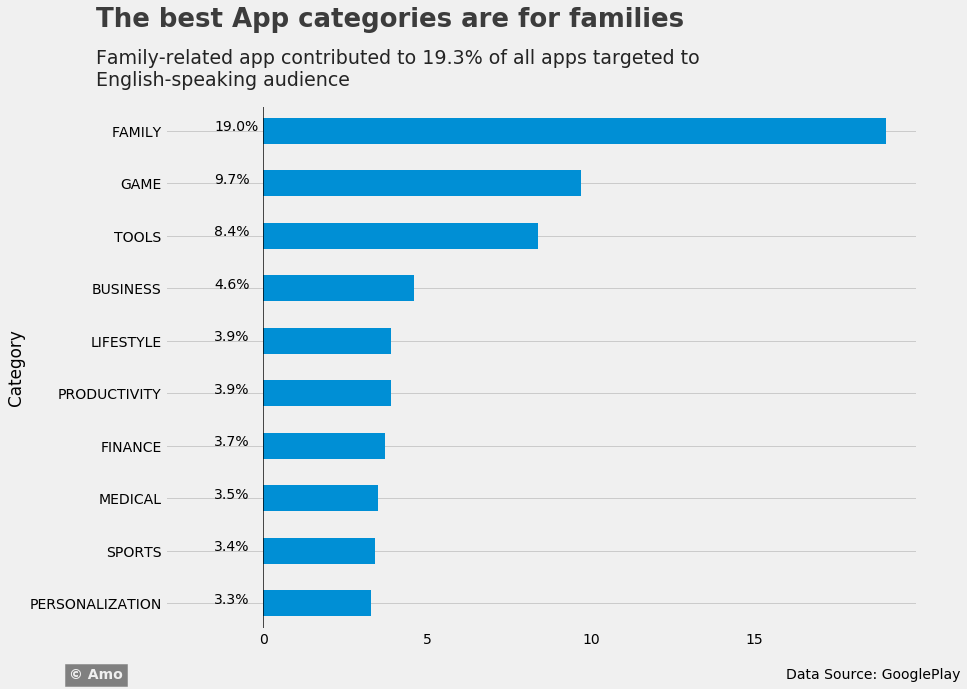

In [63]:
##
main_title = "The best App categories are for families"
subttitle = 'Family-related app contributed to 19.3% of all apps targeted to\nEnglish-speaking audience'
texts = [main_title,subttitle]


fig, ax = plt.subplots()
plot_obj = barh_plot(df=topX_categories, ax=ax, x='Category', y='percent',figsize=(12,9))
do_headings(plot_obj,fig,what=['main_heading','sub_heading'],texts=texts)
do_credits(plot_obj)
ax.grid(False,axis='x')
change_xlim(plot_obj,-3)
label_bars(plot_obj,df=topX_categories)
ax.legend().remove()

In [57]:
# Q1 : what are the top 10 genres by the average number of installs?
X = 10
topX_genres = enApps[['Genres','App','Installs']]
topX_genres['Installs'] = topX_genres['Installs'].apply(lambda x: convert_install_2_nums(x))

topX_genres = topX_genres.groupby(by='Genres').mean().reset_index()
topX_genres = topX_genres.sort_values(by='Installs',ascending=False)[:X]
topX_genres['percent'] = topX_genres['Installs'].apply(lambda x: round(x/float(topX_genres.Installs.sum()) * 100,1))
topX_genres = sort_bars(topX_genres)
topX_genres.head()

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Genres,Installs,percent
0,Productivity,1.673896e+07,7.2
1,Educational;Action & Adventure,1.701667e+07,7.3
2,Photography,1.773767e+07,7.6
3,Puzzle;Action & Adventure,1.836667e+07,7.8
4,Casual,1.963096e+07,8.4


In [56]:
topX_genres

,Genres,Installs
33,Communication,3.832263e+07
3,Adventure;Action & Adventure,3.533333e+07
110,Video Players & Editors,2.479007e+07
97,Social,2.325365e+07
5,Arcade,2.288837e+07
24,Casual,1.963096e+07
81,Puzzle;Action & Adventure,1.836667e+07
78,Photography,1.773767e+07
44,Educational;Action & Adventure,1.701667e+07
79,Productivity,1.673896e+07


In [ ]:
main_title = "Communication Apps appear to be in high demand"
subttitle = 'The demand for commuication apps is however skewed by a few big apps'
texts = [main_title,subttitle]

fig, ax = plt.subplots()
plot_obj = barh_plot(df=topX_genres, ax=ax, x='Genres', y='percent',figsize=(15,10))
do_headings(plot_obj,fig,what=['main_heading','sub_heading'],texts=texts)
do_credits(plot_obj)
ax.grid(False,axis='x')
change_xlim(plot_obj,-2)
label_bars(plot_obj,df=topX_genres)
ax.legend().remove()

In [126]:
# Q2: what is are the top 20 apps by category?

top20_by_category = enApps[['App','Category']].groupby(by='Category').count()[:20].reset_index()
top20_by_category['Contrib'] = top20_by_category['App'].apply(lambda x: round(x/float(top20_by_category.App.sum()) * 100,1))
#top20_by_category = top20_by_category.sort_values(by='App',ascending=False)
top20_by_category.head()

,Category,App,Contrib
0,1.9,1,0.0
1,ART_AND_DESIGN,60,1.1
2,AUTO_AND_VEHICLES,84,1.5
3,BEAUTY,53,0.9
4,BOOKS_AND_REFERENCE,218,3.8


In [112]:
top20_by_category.drop(index=0,axis=0,inplace=True)

In [113]:
top20_by_category.head()

,Category,App,Contrib
12,FAMILY,1860,32.6
15,GAME,941,16.5
5,BUSINESS,419,7.4
19,LIFESTYLE,364,6.4
13,FINANCE,345,6.1


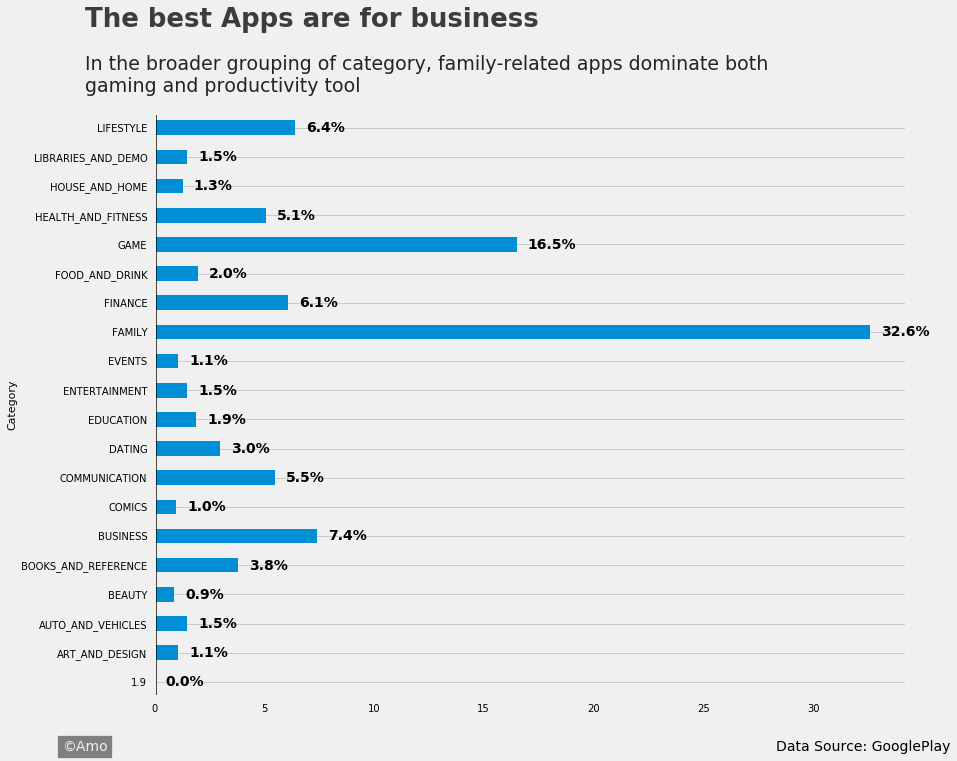

In [134]:
main_title = "Family-realted Apps are the best"
subttitle = "In the broader grouping of category, family-related apps dominate both\n\
gaming and productivity tool"
texts = [main_title,subttitle]

fig, ax = plt.subplots()
plot_obj = barh_plot(df=top20_by_category, ax=ax, x='Category', y='Contrib',figsize=(12,10))
do_headings(plot_obj,fig,what=['main_heading','sub_heading'],texts=texts)
do_credits(plot_obj)
ax.grid(False,axis='x')
label_bars(plot_obj,df=top20_by_category)
ax.legend().remove()
#plt.tight_layout()

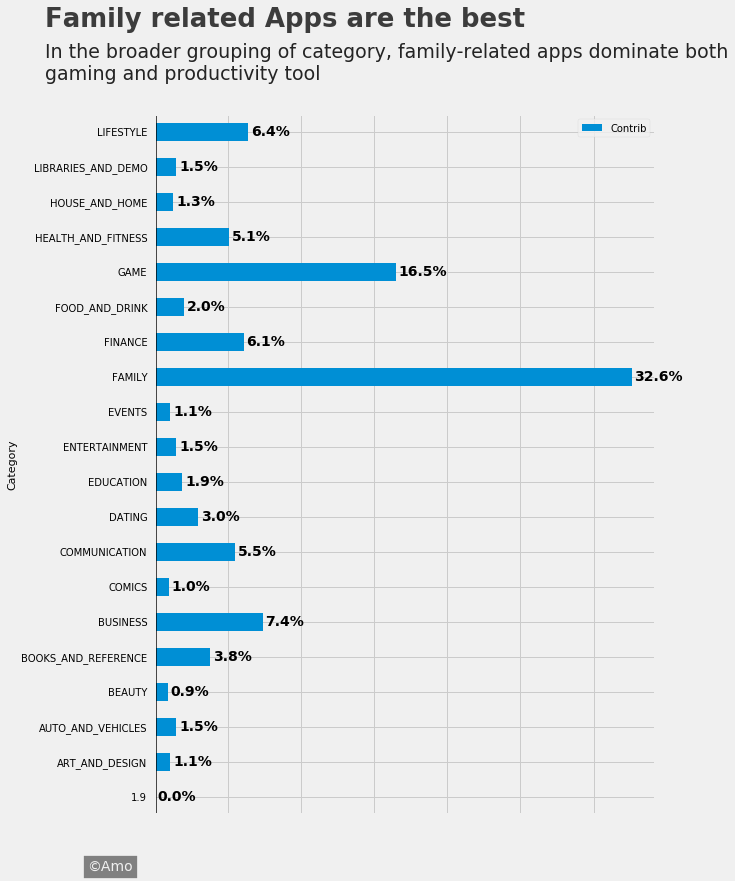

In [133]:
# plot horizontal bars

fig, ax = plt.subplots()
plot_obj = barh_plot(df=top20_by_category, ax=ax, x='Category', y='Contrib',figsize=(8,12))



# heading text

_ = plot_obj.text(x = -7.5, y = 22, s = "Family related Apps are the best",
               fontsize = 26, weight = 'bold', alpha = .75)
_ = plot_obj.text(x = -7.5, y = 20.5, s = "In the broader grouping of category, family-related apps dominate both\n\
gaming and productivity tool",
               fontsize = 19, alpha = .85)

# place text labels in the bars
ycords = plot_obj.get_yticks().tolist()
xcords = top20_by_category.Contrib.values.tolist()

for i,(j,k) in enumerate(zip(xcords,ycords)):
    _ = plot_obj.text(x=j+0.2,y=k,s=str(j)+'%', 
                      verticalalignment='center',
                     color='#000000',
                      fontsize = 14,
                      fontweight='heavy',
                     )

# turn labels of on xaxis

plot_obj.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
    
# signature text

left = '©Amo'
right = 'Data Source: GooglePlay AppStore'
_ = plot_obj.text(x = -3, y = -2,
                  s=left,fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey',verticalalignment='center',
                  horizontalalignment='center',
                 )
# _ = plot_obj.text(x = 18, y = -2,
#                   s=right,fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey',verticalalignment='center',
#                   horizontalalignment='center')

In [135]:
# Q3: what is are the top 20 apps genres within the categories?

top_bycat_bygenre = enApps[['App','Genres','Category']].groupby(by=['Category','Genres']).count().reset_index()
# top_bycat_bygenre['Contrib'] = top_bycat_bygenre['App'].apply(lambda x: round(x/float(top_bycat_bygenre.App.sum()) * 100,1))
# top_bycat_bygenre = top_bycat_bygenre.sort_values(by='App',ascending=False)[:20]
top_bycat_bygenre.head()

,Category,Genres,App
0,1.9,"February 11, 2018",1
1,ART_AND_DESIGN,Art & Design,56
2,ART_AND_DESIGN,Art & Design;Creativity,4
3,AUTO_AND_VEHICLES,Auto & Vehicles,84
4,BEAUTY,Beauty,53


### Conclusion

In this project we we analysed data from Google Play in order to make recomendations for App Developers of developing for that market.
From the results, it appears that in the braoder categories of apps, family-realted ones have a greaer appeal to users. 